In [2]:
from import_functions_generic import * 
from import_functions_plotting import * 

from functions_background import *
from functions_derive_noise_map import *

In [828]:
L = time.localtime()
date = "{}-{}-{}".format(L[0],L[1],L[2],L[3],L[4],L[5])

saving_dir = 'figs/fig_v{}/comparison/'.format(date)
os.makedirs(saving_dir,exist_ok=True)

# Initialization

In [643]:
# Parameter files
im_crop_pca = 40
im_crop_mask = im_crop_pca
platescale=7.46
W_REF = [1.247, 1.252, 1.247]

In [793]:
# Colors
list_rainbow = ['navy','dodgerblue', 'skyblue', 'purple', 'palevioletred', 'pink', 
                'crimson','orange','gold']
colors_rainbow = seaborn.blend_palette(list_rainbow,9)
display(colors_rainbow)

list_colors = [list_rainbow[0], list_rainbow[1], list_rainbow[2], list_rainbow[5], list_rainbow[8],'chartreuse']
MARKERS_IFS = ['<','>','<','>','D','D','o']
MS_IFS = 4
COLORS_IFS = colors_rainbow

cmap_white = seaborn.blend_palette(['white', 'ivory'], as_cmap=True)
cmap = cmap_white

[(0.0, 0.0, 0.5019607843137255),
 (0.11926182237600923, 0.5656593617839293, 0.9996924259900039),
 (0.529196462898885, 0.8015071126489812, 0.9182775855440215),
 (0.506159169550173, 0.005167243367935409, 0.5028373702422145),
 (0.861038062283737, 0.44413687043444827, 0.579915417147251),
 (0.9973087274125336, 0.7397154940407535, 0.7850826605151864),
 (0.8659746251441753, 0.09181084198385236, 0.22975778546712802),
 (1.0, 0.6524413687043445, 0.0),
 (1.0, 0.8431372549019608, 0.0)]

In [725]:
folder+root

'figs/fig_v2023-6-16/*/XY_inv/table_spectrum_*.csv'

In [830]:
folder = 'figs/fig_v2023-6-16/XY_/*/'
root = 'table_spectrum_*.csv'

dF_list = glob(folder+root)
dF_list = np.sort(dF_list)

XLOC_ALL, YLOC_ALL = [], []

for i, f in enumerate(dF_list): 
    print('-','[{}]'.format(i), f[len(folder)-2:-4])
    
    xloc, yloc = select_string_between_characs(f,'=','_', 0),  select_string_between_characs(f,'=','p', 1)
    try: 
        XLOC_ALL.append(float(xloc))
        YLOC_ALL.append(float(yloc))
    except: pass

fn = dF_list[3]
epoch, instru = select_string_between_characs(fn,'_','_', 5),  select_string_between_characs(fn,'_','_', 6)
XLOC_ALL, YLOC_ALL = np.array(XLOC_ALL), np.array(YLOC_ALL)
XLOC_ALL, YLOC_ALL = XLOC_ALL.astype(float)-im_crop_pca, YLOC_ALL.astype(float)-im_crop_pca

print('\nThe epoch is {} and instrument {}.'.format(epoch, instru))

- [0] east_inner/table_spectrum_2019-07-09_IFS_mask=fits_file_spatial_binning=1x1pix_spectral_binning=1
- [1] east_inner/table_spectrum_2019-07-09_IFS_mask=fits_file_spatial_binning=1x1pix_spectral_binning=2
- [2] east_inner/table_spectrum_2019-07-09_IFS_mask=fits_file_spatial_binning=1x1pix_spectral_binning=3
- [3] loc_x=140_y=108pix/table_spectrum_2019-07-09_IFS_mask=circular_spatial_binning=1x1pix_spectral_binning=1
- [4] loc_x=140_y=108pix/table_spectrum_2019-07-09_IFS_mask=circular_spatial_binning=1x1pix_spectral_binning=2
- [5] loc_x=140_y=108pix/table_spectrum_2019-07-09_IFS_mask=circular_spatial_binning=1x1pix_spectral_binning=3
- [6] loc_x=190_y=190pix/table_spectrum_2019-07-09_IFS_mask=circular_spatial_binning=1x1pix_spectral_binning=1
- [7] loc_x=190_y=190pix/table_spectrum_2019-07-09_IFS_mask=circular_spatial_binning=1x1pix_spectral_binning=2
- [8] loc_x=190_y=190pix/table_spectrum_2019-07-09_IFS_mask=circular_spatial_binning=1x1pix_spectral_binning=3
- [9] loc_x=87.5_y=113

In [810]:
# Example dataframe
dF = pd.read_csv(fn)
dF.columns

Index(['Unnamed: 0', 'wavelength (mic)', 'flux_star (W/m^2)', 'flux (W/m^2)',
       'flux_e (W/m^2)', 'contrast', 'contrast_e', 'flux (ADU/arcsec^2)',
       'flux_e (ADU/arcsec^2)'],
      dtype='object')

In [811]:
columns_dF = ['wavelength (mic)', 'flux_star (W/m^2)', 'flux (W/m^2)', 'flux_e (W/m^2)', 
              'contrast', 'contrast_e', 'flux (ADU/arcsec^2)',  'flux_e (ADU/arcsec^2)']

In [831]:
dF.tail()

,Unnamed: 0,wavelength (mic),flux_star (W/m^2),flux (W/m^2),flux_e (W/m^2),contrast,contrast_e,flux (ADU/arcsec^2),flux_e (ADU/arcsec^2)
34,34,1.29422,1.492843e-08,-3.548333e-19,4.218943e-18,-2.376896e-11,2.826113e-10,-0.000026,0.000315
35,35,1.30319,1.468796e-08,-1.913197e-18,5.620158e-18,-1.302561e-10,3.826372e-10,-0.000149,0.000437
36,36,1.31197,1.438495e-08,-9.299118e-19,5.639035e-18,-6.464475e-11,3.920092e-10,-0.000071,0.000431
37,37,1.32052,1.413144e-08,-1.187601e-18,7.213747e-18,-8.403962e-11,5.104749e-10,-0.000080,0.000486
38,38,1.32884,1.388749e-08,4.946324e-20,9.427989e-18,3.561712e-12,6.788836e-10,0.000002,0.000475


# Plot Spectrum

In [829]:
didx = 0
index = np.array([0, 9, 12, 15, 18, 6]) + didx #np.array([0, 6, 9, 12, 3, 15]) +didx

FNs = [dF_list[idx] for idx in index] 
LABELS = ['East inner belt', 'East 1', 'East 2', 'West inner belt', 'West outer belt', 'sky'] #'West 1', 'West outer belt']
#LABELS = ['East \ninner belt', 'E1', 'E2', 'West \ninner belt', 'West \nouter belt', 'sky'] #'West 1', 'West outer belt']

dFs = [pd.read_csv(fn) for fn in FNs]

# location
index_loc = np.arange(3,12,3) #np.arange(0,9,3)
XLOC, YLOC = XLOC_ALL[index_loc], YLOC_ALL[index_loc]
LABELS_LOC = np.array(LABELS)[[-1,1,2]] #np.array(LABELS)[[1,2,4]]
COLORS_LOC = np.array(list_colors)[[-1,1,2]] #np.array(list_colors)[[1,2,4]]

In [815]:
XLOC, YLOC

(array([150. ,  47.5,  54. ]), array([150.,  73.,  73.]))

In [816]:
COLORS_LOC

array(['chartreuse', 'dodgerblue', 'skyblue'], dtype='<U10')

In [817]:
LABELS_LOC

array(['sky', 'East 1', 'East 2'], dtype='<U15')

### Contrast

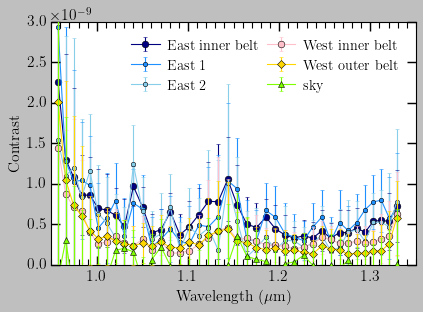

In [820]:
# Contrast

spatial_binning_factor, spectral_binning_factor = 1, 1+didx
col_X, col_Y, col_Y_err = columns_dF[0], columns_dF[4], columns_dF[5]
xlim = [0.95,1.35]
add_errorbar = 1
suffix=''

if add_errorbar: suffix = '_errorbar'

# Figure spectrum (flux (W/m^2))
namesave='comparaison_spectrum_contrast_{}_{}_spatial_binning={}x{}pix_spectral_binning={}{}.pdf'.format(epoch, instru, 
                spatial_binning_factor, spatial_binning_factor,  spectral_binning_factor, suffix)


fig, ax = plt.subplots(1,1, figsize=(6,4))
fig.subplots_adjust(left=0.2,right=0.96,bottom=0.17,top=0.93)
ax.set_xlabel('Wavelength ($\mu$m)');  ax.set_ylabel('Contrast')

for i, dF in enumerate(dFs):
    X, Y, Y_err = np.array(dF[col_X]), np.array(dF[col_Y]), np.array(dF[col_Y_err])
    if 'outer' in LABELS[i]: mkr = 'D'; ms=MS_IFS+1;zorder=i
    elif 'inner' in LABELS[i]: mkr =  MARKERS_IFS[6]; ms=MS_IFS+2;zorder=i
    elif 'sky' in LABELS[i].lower(): mkr =  '^'; ms=MS_IFS+2;zorder=i
    else: mkr = MARKERS_IFS[6]; ms=MS_IFS
    
    label = "Opposite "+LABELS[i]
    label = LABELS[i]
    if add_errorbar:
        ax.errorbar(X, Y, Y_err, marker=mkr, ms=ms, capsize=2,
            label=label, color=list_colors[i], zorder=zorder) 
    
    else: ax.plot(X, Y, marker=mkr, ms=ms, label=label, color=list_colors[i], zorder=zorder)

mise_en_page(ax,x_step=1, x_maj_step=0.1, x_min_step=0.01, y_step=0, y_maj_step=0.5, y_min_step=0.1)
ylim = ax.get_ylim()
ylim = [0,ylim[1]]
ylim = [0,3e-9]

ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.legend(loc='upper right', numpoints=1, ncol=2, frameon=False)

plt.savefig(saving_dir+namesave)
plt.show()

In [722]:
np.sqrt((190-100)**2+(190-100)**2)*7.46

949.5029857772961

### Flux (W/m^2)

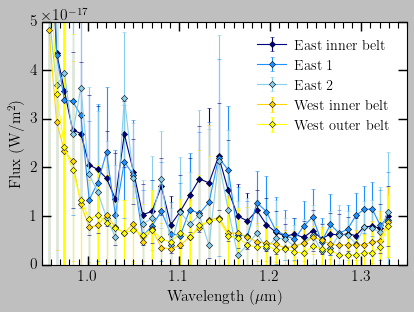

In [597]:
# Flux

spatial_binning_factor, spectral_binning_factor = 1, 1+didx
col_X, col_Y, col_Y_err = columns_dF[0], columns_dF[2], columns_dF[3]
xlim = [0.95,1.35]
add_errorbar = 1
suffix=''

if add_errorbar: suffix = '_errorbar'

# Figure spectrum (flux (W/m^2))
namesave='comparaison_spectrum_fluxWm2_{}_{}_spatial_binning={}x{}pix_spectral_binning={}{}.pdf'.format(epoch, instru, 
                spatial_binning_factor, spatial_binning_factor,  spectral_binning_factor, suffix)


fig, ax = plt.subplots(1,1, figsize=(6,4))
fig.subplots_adjust(left=0.2,right=0.96,bottom=0.17,top=0.93)
ax.set_xlabel('Wavelength ($\mu$m)');  ax.set_ylabel('Flux (W/m$^2$)')

for i, dF in enumerate(dFs):
    X, Y, Y_err = np.array(dF[col_X]), np.array(dF[col_Y]), np.array(dF[col_Y_err])

    if add_errorbar:
        ax.errorbar(X, Y, Y_err, marker=MARKERS_IFS[4], ms=MS_IFS, capsize=2,
            label=LABELS[i], color=list_colors[i]) #, zorder=-i)
    
    else: ax.plot(X, Y, marker=MARKERS_IFS[4], ms=MS_IFS, label=LABELS[i], color=list_colors[i])

mise_en_page(ax,x_step=1, x_maj_step=0.1, x_min_step=0.01, y_step=0, y_maj_step=0.5, y_min_step=0.1)
ylim = ax.get_ylim()
ylim = [0,ylim[1]]
ylim = [0,5e-17]

ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.legend(loc='best', numpoints=1, ncol=1, frameon=False)

plt.savefig(saving_dir+namesave)
plt.show()

# Plot image

In [763]:
# Image
didx = 0
fn_im = folder[:-2]+'im_binning_spatial=1x1pix_binning_spectral={}.fits'.format(didx+1)
IM = fits.getdata(fn_im)

# Image Mask
infolder_mask = '/Users/desgranc/Documents/work/GitHub_clone/projects/HD102326/grater_diskfm_mcmc/inputs/'
fn_im_mask = infolder_mask+'mask_inner_belt_east_2019-07-09_IFS.fits'
IM_MASK1 = fits.getdata(fn_im_mask)[im_crop_mask:-im_crop_mask,im_crop_mask:-im_crop_mask]

fn_im_mask = infolder_mask+'mask_inner_belt_west_2019-07-09_IFS.fits'
IM_MASK2 = fits.getdata(fn_im_mask)[im_crop_mask:-im_crop_mask,im_crop_mask:-im_crop_mask]

fn_im_mask = infolder_mask+'mask_outer_belt_west_2019-07-09_IFS_from_IRDIS.fits'
IM_MASK3 = fits.getdata(fn_im_mask)[im_crop_mask:-im_crop_mask,im_crop_mask:-im_crop_mask]



In [770]:
def add_aperture(ax, IM, xloc_orig, yloc_orig, rcut_orig = 3, platescale=7.46, edgecolor='white', add_insert=1,
                xdeb = 0.05, ydeb = 0.035, xlong = 0.3, ylong = 0.3, add_scalebar=1, add_label=0, label=''):
    print('Add circular aperture centered at ({},{})'.format(xloc_orig, yloc_orig))
    
    # Original Image
    circ = Circle((xloc_orig, yloc_orig), rcut_orig, edgecolor=edgecolor, fc='None', lw=0.5)
    ax.add_patch(circ)
    #if add_label: ax.text(xloc_orig,yloc_orig, label, color=edgecolor)
    
    # Insert
    if add_insert:
        rsize= 6
        xzoom_deb,  xzoom_fin = 1+int(xloc_orig-rsize), 1+int(xloc_orig+rsize)
        yzoom_deb,  yzoom_fin = 1+int(yloc_orig-rsize), 1+int(yloc_orig+rsize)

        size = (xzoom_fin-xzoom_deb, yzoom_fin-yzoom_deb) # pixels
        size_mid = (rsize+xloc_orig%1-1, rsize+yloc_orig%1-1)

        cutout = IM[yzoom_deb:yzoom_fin, xzoom_deb:xzoom_fin]
        axes2 = fig.add_axes([xdeb, ydeb, xlong, ylong]) # renvoie un objet Axes
        axes2.imshow(cutout, interpolation='nearest', origin='lower', vmax=vmax,vmin=-vmax, cmap='magma')
        axes2.axis('off')
        circ = Circle(size_mid, rcut_orig, edgecolor=edgecolor, fc='None', lw=0.5)
        axes2.add_patch(circ)
        rect = Rectangle((-0.5,-0.5), size[0], size[1], edgecolor='black', fc='None', lw=2)
        axes2.add_patch(rect)

        if add_label: 
            axes2.text(0.05,0.78,label,transform=axes2.transAxes,color=edgecolor,fontsize=11)
            #axes2.text(size_mid[0],size_mid[0],label, color=edgecolor)

    # Add scalebar in the insert
    if add_scalebar:
        scalebar_pix,  scalebar_leg = 10, '0.01"'
        size = scalebar_pix/(platescale)
        fp = FontProperties(size=12)
        scalebar = AnchoredSizeBar(axes2.transData, size, scalebar_leg, 1, label_top=True, pad=0.1,
                                       sep=1, borderpad=0.1, frameon=False, size_vertical=1, color='white', fontproperties=fp)
        axes2.add_artist(scalebar)
    return 

## good XY axis

Add circular aperture centered at (47.5,73.0)
Add circular aperture centered at (54.0,73.0)
Add circular aperture centered at (150.0,150.0)
Size image mask (160, 160)
Size image mask (160, 160)
Size image mask (160, 160)


/var/folders/k2/sfv4r4z938l77n1t4ydth2v401phl2/T/ipykernel_84868/1660157334.py:31: UserWarning: No contour levels were found within the data range.
  contours = ax.contour(XX, YY, imc, lvl_contours, colors=list_colors[0], linewidths=0.5, linestyles='-')
/var/folders/k2/sfv4r4z938l77n1t4ydth2v401phl2/T/ipykernel_84868/1660157334.py:41: UserWarning: No contour levels were found within the data range.
  contours = ax.contour(XX, YY, imc, lvl_contours, colors=list_colors[3], linewidths=0.5, linestyles='-')
/var/folders/k2/sfv4r4z938l77n1t4ydth2v401phl2/T/ipykernel_84868/1660157334.py:51: UserWarning: No contour levels were found within the data range.
  contours = ax.contour(XX, YY, imc, lvl_contours, colors=list_colors[4], linewidths=0.5, linestyles='-')


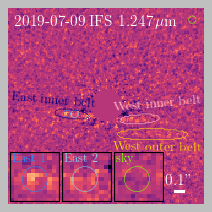

In [827]:
text = '{} {} {}$\,\mu$m'.format(epoch, instru, W_REF[didx])
namesave='comparaison_image_{}_{}_spatial_binning={}x{}pix_spectral_binning={}'.format(epoch, instru, 
                spatial_binning_factor, spatial_binning_factor,  didx+1, suffix)

vmax=np.nanmax(IM)

fig, ax = plot_fig(IM, add_colorbar=0, figsize=(2.5,2.5), add_text=1, text=text,
    do_tight_layout=1, flux_use_binning_factor=1, vmax=vmax, vmin=-vmax,  scalebar_loc=4,  scalebar_pad=0.3,
    namesave=namesave, saving_dir=saving_dir, 
    scalebar_leg='0.1"',  return_fig_ax=1)


# Add circular apertures on the image
xdeb = 0.02
ydeb = xdeb
idx_sort = np.argsort(XLOC)
XLOC, YLOC = XLOC[idx_sort], YLOC[idx_sort]
COLORS_LOC, LABELS_LOC = COLORS_LOC[idx_sort], LABELS_LOC[idx_sort]
for i in range(len(LABELS_LOC)):
    xloc_orig, yloc_orig = XLOC[i], YLOC[i]
    add_aperture(ax, IM, xloc_orig, yloc_orig, rcut_orig=3, platescale=7.46, edgecolor=COLORS_LOC[i], 
                xdeb=xdeb, ydeb=ydeb, xlong=0.25, ylong=0.25, add_scalebar=0, label=LABELS_LOC[i], add_label=1)
    xdeb+=0.26

# Add zone East disk
n_final = np.shape(IM_MASK1)[-1]
imc = IM_MASK1
print('Size image mask', np.shape(imc))
lvl_contours=0
XX, YY = np.arange(n_final), np.arange(n_final)
contours = ax.contour(XX, YY, imc, lvl_contours, colors=list_colors[0], linewidths=0.5, linestyles='-')
ax.text(94-im_crop_pca-52, 101-im_crop_pca+17, LABELS[0], color=list_colors[0], fontsize=12, rotation=-5)
#ax.text(94-im_crop_pca-35+10, 113-im_crop_pca+7, 'belt', color=list_colors[0], fontsize=12)
 
# Add zone West disk
n_final = np.shape(IM_MASK2)[-1]
imc = IM_MASK2
print('Size image mask', np.shape(imc))
lvl_contours=0
XX, YY = np.arange(n_final), np.arange(n_final)
contours = ax.contour(XX, YY, imc, lvl_contours, colors=list_colors[3], linewidths=0.5, linestyles='-')
ax.text(147-im_crop_pca-22, 109.5-im_crop_pca+6, LABELS[3], color=list_colors[3], fontsize=12, rotation=5)
  
    
# Add zone West outer disk
n_final = np.shape(IM_MASK3)[-1]
imc = IM_MASK3
print('Size image mask', np.shape(imc))
lvl_contours=0
XX, YY = np.arange(n_final), np.arange(n_final)
contours = ax.contour(XX, YY, imc, lvl_contours, colors=list_colors[4], linewidths=0.5, linestyles='-')
ax.text(130-im_crop_pca-5, 109.5-im_crop_pca-27, LABELS[4], color=list_colors[4], fontsize=12, rotation=-1)
    
    
fig.subplots_adjust(left=0.01, right=0.99, top=0.99, bottom=0.01, wspace=0.02)
plt.savefig(saving_dir+namesave+'.pdf', dpi=300)

## Invert XY axis

In [765]:
IM = IM[::-1,::-1]

111.5 86.0
Add circular aperture centered at (111.5,86.0)
47.5 73.0 dodgerblue East 1
105.0 86.0
Add circular aperture centered at (105.0,86.0)
54.0 73.0 skyblue East 2
9.0 9.0
Add circular aperture centered at (9.0,9.0)
150.0 150.0 chartreuse sky
Size image mask (160, 160)
Size image mask (160, 160)
Size image mask (160, 160)


/var/folders/k2/sfv4r4z938l77n1t4ydth2v401phl2/T/ipykernel_84868/4222456609.py:39: UserWarning: No contour levels were found within the data range.
  contours = ax.contour(XX, YY, imc, lvl_contours, colors=list_colors[0], linewidths=0.5, linestyles='-')
/var/folders/k2/sfv4r4z938l77n1t4ydth2v401phl2/T/ipykernel_84868/4222456609.py:49: UserWarning: No contour levels were found within the data range.
  contours = ax.contour(XX, YY, imc, lvl_contours, colors=list_colors[3], linewidths=0.5, linestyles='-')
/var/folders/k2/sfv4r4z938l77n1t4ydth2v401phl2/T/ipykernel_84868/4222456609.py:59: UserWarning: No contour levels were found within the data range.
  contours = ax.contour(XX, YY, imc, lvl_contours, colors=list_colors[4], linewidths=0.5, linestyles='-')


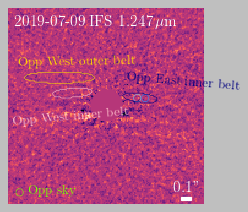

In [825]:
text = '{} {} {}$\,\mu$m'.format(epoch, instru, W_REF[didx])
namesave='comparaison_image_{}_{}_spatial_binning={}x{}pix_spectral_binning={}'.format(epoch, instru, 
                spatial_binning_factor, spatial_binning_factor,  didx+1)

vmax=np.nanmax(IM)

fig, ax = plot_fig(IM, add_colorbar=0, figsize=(2.5,2.5), add_text=1, text=text,
    do_tight_layout=1, flux_use_binning_factor=1, vmax=vmax, vmin=-vmax,  scalebar_loc=4,  scalebar_pad=0.15,
    namesave=namesave, saving_dir=saving_dir, scalebar_borderpad=0.15,
    scalebar_leg='0.1"',  return_fig_ax=1)


# Add circular apertures on the image
xdeb = 0.02
ydeb = xdeb
idx_sort = np.argsort(XLOC)

XLOC, YLOC = XLOC[idx_sort], YLOC[idx_sort]
COLORS_LOC, LABELS_LOC = COLORS_LOC[idx_sort], LABELS_LOC[idx_sort]
w,h = np.shape(IM)
for i in range(len(LABELS_LOC)):
    xloc_orig, yloc_orig = XLOC[i], YLOC[i]
    xloc_orig, yloc_orig = w-xloc_orig-1, h-yloc_orig-1
    print(xloc_orig, yloc_orig)
    add_aperture(ax, IM, xloc_orig, yloc_orig, rcut_orig=3, platescale=7.46, edgecolor=COLORS_LOC[i], add_insert=0,
                xdeb=xdeb, ydeb=ydeb, xlong=0.25, ylong=0.25, add_scalebar=0, label="Opp "+LABELS_LOC[i], add_label=1)
    xdeb+=0.26
    print(XLOC[i], YLOC[i], COLORS_LOC[i],LABELS_LOC[i])
    
ax.text(0.1,0.05,"Opp sky", color=list_colors[-1], fontsize=12, rotation=0, transform=ax.transAxes)
  

# Add zone East disk
n_final = np.shape(IM_MASK1)[-1]
imc = IM_MASK1[::-1,::-1]
print('Size image mask', np.shape(imc))
lvl_contours=0
XX, YY = np.arange(n_final), np.arange(n_final)
contours = ax.contour(XX, YY, imc, lvl_contours, colors=list_colors[0], linewidths=0.5, linestyles='-')
ax.text(0.6,0.58, "Opp "+LABELS[0], color=list_colors[0], fontsize=12, rotation=-5, transform=ax.transAxes)
#ax.text(94-im_crop_pca-35+10, 113-im_crop_pca+7, 'belt', color=list_colors[0], fontsize=12)
 
# Add zone West disk
n_final = np.shape(IM_MASK2)[-1]
imc = IM_MASK2[::-1,::-1]
print('Size image mask', np.shape(imc))
lvl_contours=0
XX, YY = np.arange(n_final), np.arange(n_final)
contours = ax.contour(XX, YY, imc, lvl_contours, colors=list_colors[3], linewidths=0.5, linestyles='-')
ax.text(0.02,0.4,"Opp "+LABELS[3], color=list_colors[3], fontsize=12, rotation=5, transform=ax.transAxes)
  
    
# Add zone West outer disk
n_final = np.shape(IM_MASK3)[-1]
imc = IM_MASK3[::-1,::-1]
print('Size image mask', np.shape(imc))
lvl_contours=0
XX, YY = np.arange(n_final), np.arange(n_final)
contours = ax.contour(XX, YY, imc, lvl_contours, colors=list_colors[4], linewidths=0.5, linestyles='-')
ax.text(0.05,0.7, "Opp "+LABELS[4], color=list_colors[4], fontsize=12, rotation=1, transform=ax.transAxes)
    
    
fig.subplots_adjust(left=0.01, right=0.99, top=0.99, bottom=0.01, wspace=0.02)
plt.savefig(saving_dir+namesave+'.pdf', dpi=300)

array([ 47.5,  47.5,  47.5,  54. ,  54. ,  54. , 100. , 100. , 100. ])

In [392]:
XLOC

array([ 87.5,  94. , 140. ])

In [391]:
YLOC

array([ 87.5,  94. , 140. ])